## Exploratory Data Analysis
#### DSC 672 - Impact Genome
#### Julia Aptekar, John Leniart, Arham Mehdi, Natalie Olechno

------------

In [4]:
#cd C:\\Users\\jclen\\OneDrive\\Desktop\\DSC 672 - Capstone\\Group Project\\Data

C:\Users\jclen\OneDrive\Desktop\DSC 672 - Capstone\Group Project\Data


In [5]:
#Import required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [6]:
#Load data
fileName = 'Validated Data from Heather.xlsx'
df = pd.read_excel(fileName)

In [7]:
df.head(5)

,programreportid,programdescription,impactarea,genome,outcome,outcomeid
0,587,Free community programming is a pillar of our ...,Arts,Access and Appreciation,Reached Diverse Audiences,155.0
1,780,My Program rule!,Arts,Access and Appreciation,Enhanced Arts Appreciation,67.0
2,877,TBD\xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx...,Arts,Access and Appreciation,Enhanced Arts Appreciation,67.0
3,892,VGâ€™s Arts Education Programs yearly engage n...,Arts,Access and Appreciation,Enhanced Arts Appreciation,67.0
4,899,"The Met Corporate Patron Program, led by the M...",Arts,Access and Appreciation,Enhanced Arts Appreciation,67.0


In [8]:
#Check data types
df.dtypes

programreportid         int64
programdescription     object
impactarea             object
genome                 object
outcome                object
outcomeid             float64
dtype: object

In [9]:
#Change programreportid and outcomeid to categorical data type
df['programreportid'] = df['programreportid'].astype('category')
df['outcomeid'] = df['outcomeid'].astype('category')
df.dtypes

programreportid       category
programdescription      object
impactarea              object
genome                  object
outcome                 object
outcomeid             category
dtype: object

In [10]:
#Check counts
df.count()

programreportid       6649
programdescription    6642
impactarea            6449
genome                6449
outcome               6449
outcomeid             6449
dtype: int64

In [11]:
#Drop all null values
df = df.dropna()
df.count()

programreportid       6442
programdescription    6442
impactarea            6442
genome                6442
outcome               6442
outcomeid             6442
dtype: int64

There were 207 rows containing null values. All were dropped.

In [13]:
#Remove special characters from program description
#Leave only letters, numbers, and some punctutation marks (colon, period, comma, apostraphe, hyphen)
df['programdescription'] = [re.sub(r"[^A-Za-z0-9 :.,'-]+", "", x) for x in df['programdescription']]
df.head(5)

,programreportid,programdescription,impactarea,genome,outcome,outcomeid
0,587,Free community programming is a pillar of our ...,Arts,Access and Appreciation,Reached Diverse Audiences,155.0
1,780,My Program rule,Arts,Access and Appreciation,Enhanced Arts Appreciation,67.0
2,877,TBDxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx...,Arts,Access and Appreciation,Enhanced Arts Appreciation,67.0
3,892,VGs Arts Education Programs yearly engage near...,Arts,Access and Appreciation,Enhanced Arts Appreciation,67.0
4,899,"The Met Corporate Patron Program, led by the M...",Arts,Access and Appreciation,Enhanced Arts Appreciation,67.0


In [14]:
#Check descriptive statistics for all columns
df.describe(include='all')

,programreportid,programdescription,impactarea,genome,outcome,outcomeid
count,6442,6442,6442,6442,6442,6442.0
unique,6442,3652,12,50,201,289.0
top,76,Graduation Alliance's Dropout Recovery program...,Education,Healthcare Access and Advocacy,Healthcare Utilization,872.0
freq,1,135,1436,698,361,361.0


In this dataset there are:
- 3652 unique program descriptions
- 12 unique impact areas
- 50 unique genomes
- 201 unique outcomes
- 289 unique outcome ids

-------------

### Program Description

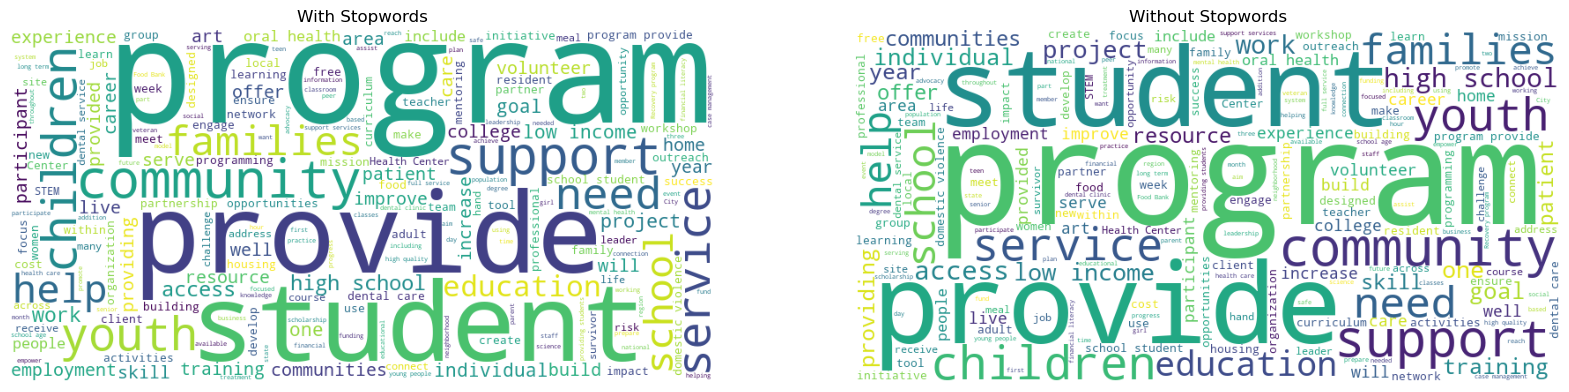

In [18]:
#Combine program descriptions into 1 string
text=" ".join(description for description in df['programdescription'])

#Generate word clouds with and without stopwords
wc_stopwords= WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)
wc_no_stopwords= WordCloud(background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(wc_stopwords)
plt.title("With Stopwords")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(wc_no_stopwords)
plt.title("Without Stopwords")
plt.axis("off")
plt.show()

----------------------

### Impact Area

In [21]:
#Value counts for impact area
print(df['impactarea'].value_counts())

impactarea
Education                         1436
Economic Development              1205
Public Health                     1097
Critical Human Needs               999
Youth                              519
Systems Change                     393
Arts                               335
Global Development                 166
Sustainability and Environment     132
Culture and Identity                79
Science and Technology              62
Criminal Justice                    19
Name: count, dtype: int64


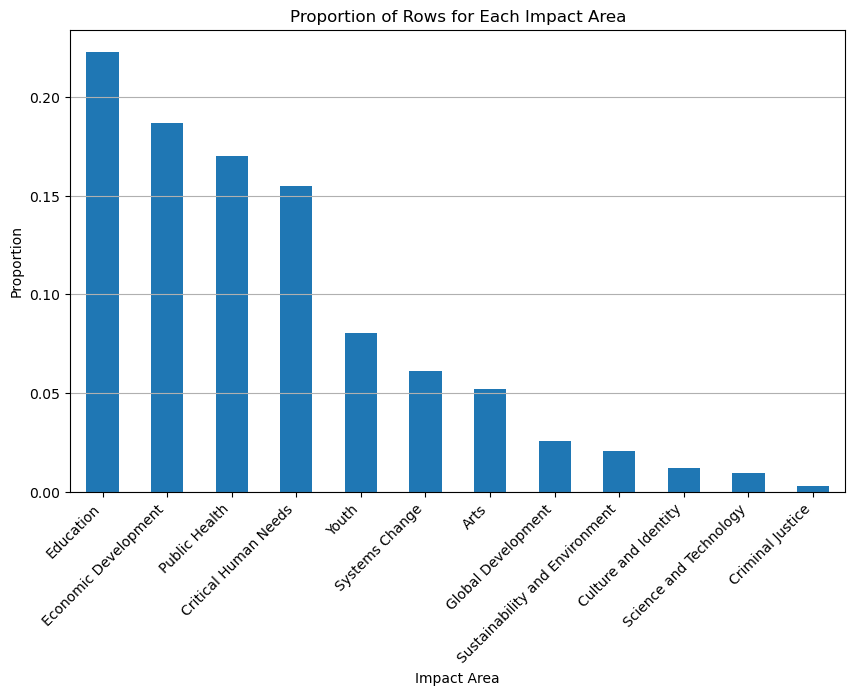

In [22]:
#Bar chart showing proportion of rows in the dataset assigned to each impact area
plt.figure(figsize=(10, 6))
df['impactarea'].value_counts(normalize=True).plot(kind='bar')
plt.title('Proportion of Rows for Each Impact Area')
plt.xlabel('Impact Area')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

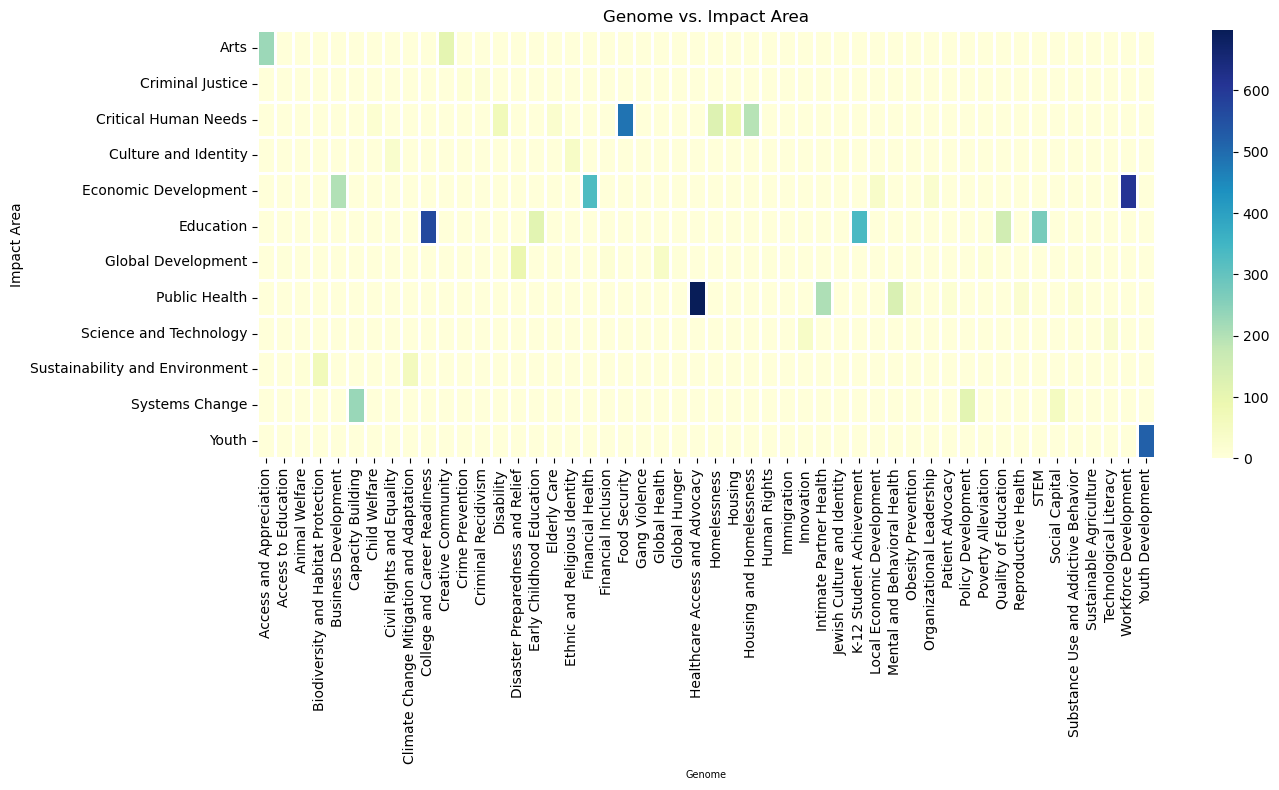

In [23]:
#Heatmap showing the counts for each combination of impact area and genome
pivot_table= df.pivot_table(index='impactarea', columns='genome', aggfunc='size', fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=False, linewidths=2, linecolor='white')
plt.title("Genome vs. Impact Area")
plt.xlabel('Genome', fontsize=7)
plt.ylabel('Impact Area')
plt.tight_layout()
plt.show()

--------------------

### Genome

In [26]:
#Value counts for genome
print(df['genome'].value_counts())

genome
Healthcare Access and Advocacy              698
Workforce Development                       609
College and Career Readiness                565
Youth Development                           519
Food Security                               487
K-12 Student Achievement                    336
Financial Health                            331
STEM                                        270
Capacity Building                           230
Access and Appreciation                     227
Intimate Partner Health                     205
Business Development                        201
Housing and Homelessness                    194
Quality of Education                        152
Mental and Behavioral Health                135
Homelessness                                124
Early Childhood Education                   113
Policy Development                          111
Creative Community                          108
Disaster Preparedness and Relief             91
Housing                          

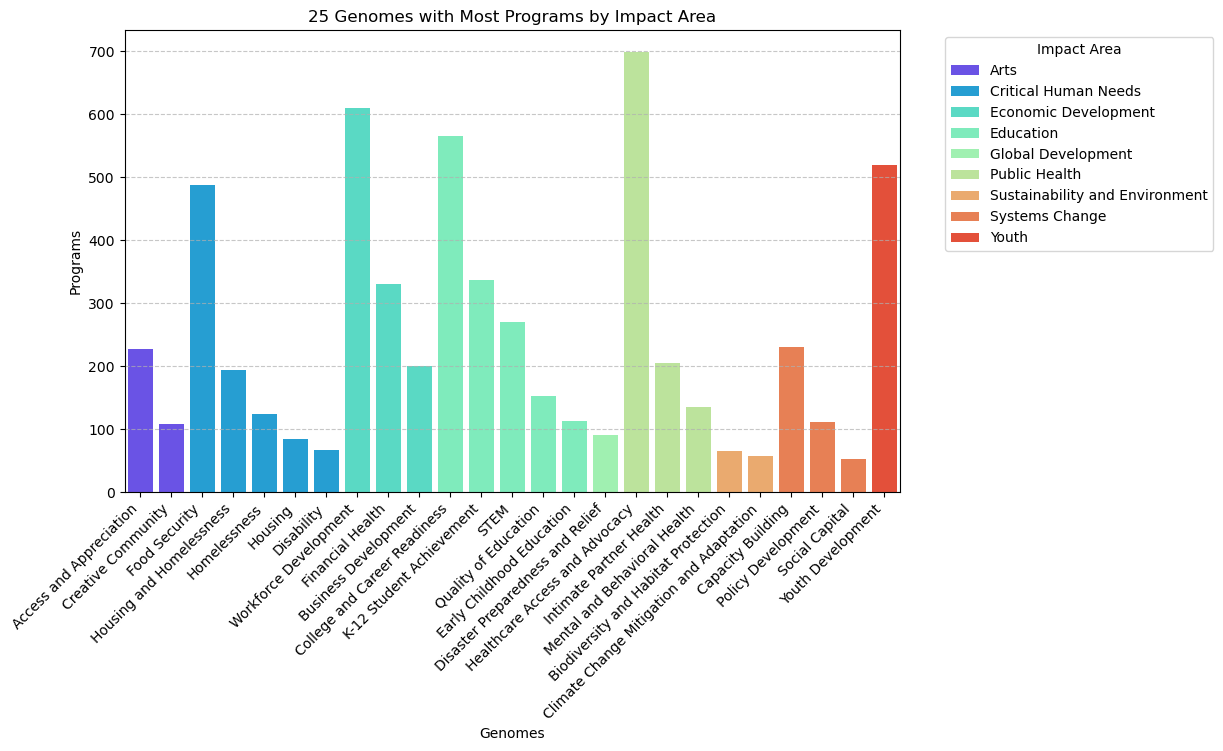

In [27]:
#Define colormap
unique_impactareas = sorted(df['impactarea'].unique())
color_palette = sns.color_palette("rainbow", n_colors=len(unique_impactareas))
iacm = dict(zip(unique_impactareas, color_palette))

#Group and sort data (descending order)
df_summary = df.groupby(["impactarea", "genome"]).size().reset_index(name="n")
df_summary = df_summary.sort_values(by="n", ascending=False)
top_25_df = df_summary.head(25)
top_25_df_sort = top_25_df.sort_values(by=["impactarea", "n"], ascending=[True, False])

#Generate bar chart showing 25 genomes with the most number of programs
plt.figure(figsize = (10, 6))
sns.barplot(data=top_25_df_sort, x="genome", y="n", hue="impactarea", palette=iacm)
plt.xlabel("Genomes")
plt.ylabel("Programs")
plt.title("25 Genomes with Most Programs by Impact Area")
plt.xticks(rotation=45, ha="right") 
plt.legend(title="Impact Area", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

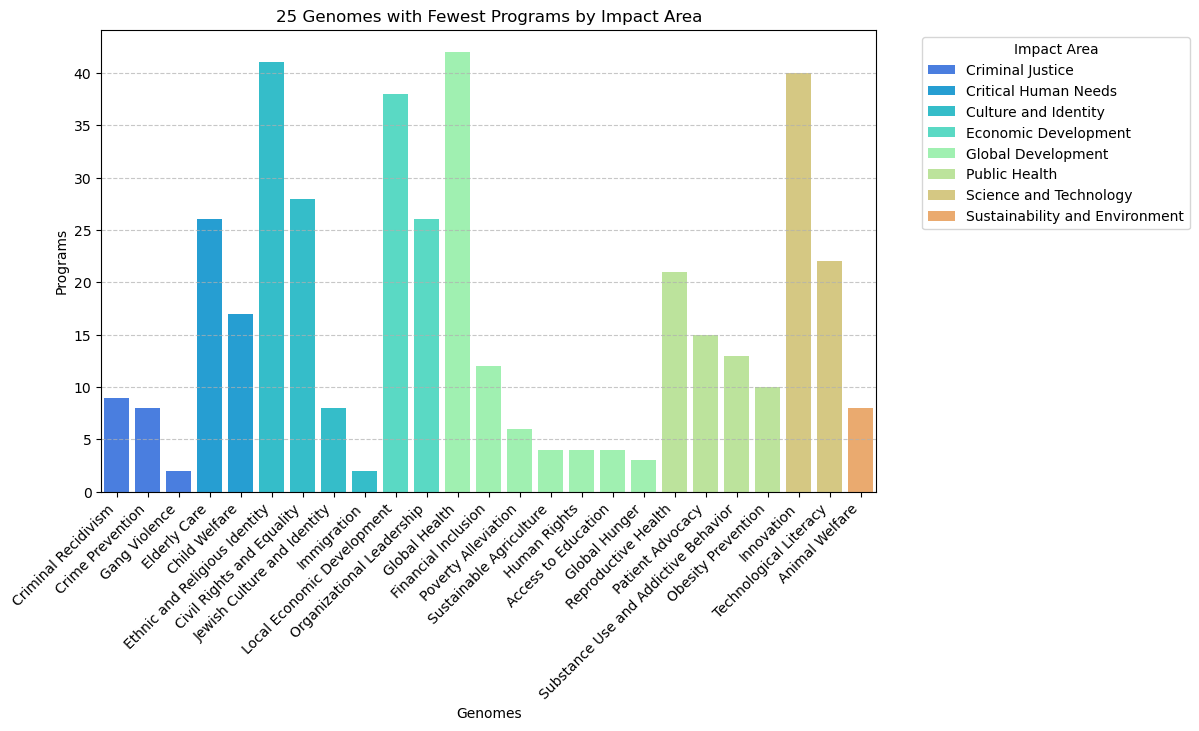

In [28]:
#Group and sort data (acending order)
df_summary = df.groupby(["impactarea", "genome"]).size().reset_index(name="n")
df_summary = df_summary.sort_values(by="n", ascending=True)
bottom_25_df = df_summary.head(25)
bottom_25_df_sort = bottom_25_df.sort_values(by=["impactarea", "n"], ascending=[True, False])

#Generate bar chart showing 25 genomes with the fewest number of programs
plt.figure(figsize = (10, 6))
sns.barplot(data=bottom_25_df_sort, x="genome", y="n", hue="impactarea", palette=iacm)
plt.xlabel("Genomes")
plt.ylabel("Programs")
plt.title("25 Genomes with Fewest Programs by Impact Area")
plt.xticks(rotation=45, ha="right")  
plt.legend(title="Impact Area", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

--------------------

### Outcome

In [31]:
#Create new dataframe with outcome ids and their frequency (value count)
ID_counts_df = pd.DataFrame(df['outcomeid'].value_counts())
ID_counts_df.columns = ['outcomeid_count']
ID_counts_df['outcomeid'] = ID_counts_df.index
ID_counts_df.head(5)

,outcomeid_count,outcomeid
outcomeid,,
872.0,361,872.0
190.0,246,190.0
7.0,235,7.0
21.0,224,21.0
96.0,198,96.0


In [32]:
#Check the descriptive statistics
pd.set_option('display.float_format', lambda x: '%.2f' % x) #round to 2 decimal places
ID_counts_df.describe(include='all')

,outcomeid_count,outcomeid
count,289.00,289.00
unique,NaN,289.00
top,NaN,1.00
freq,NaN,1.00
mean,22.29,NaN
std,45.09,NaN
min,1.00,NaN
25%,2.00,NaN
50%,4.00,NaN
75%,19.00,NaN


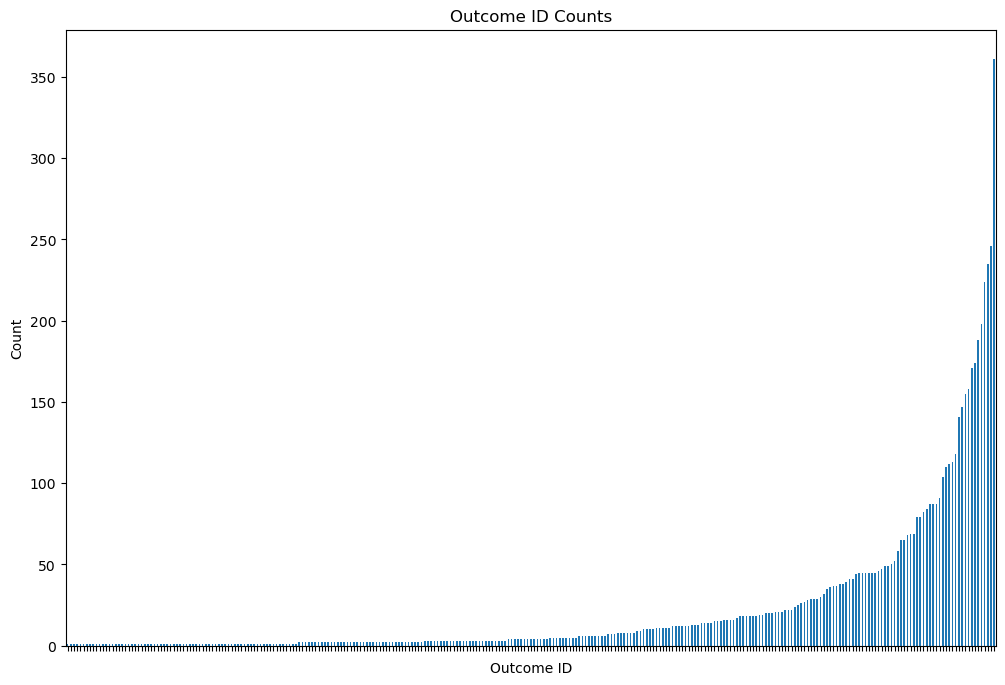

In [33]:
#Create a bar chart showing the sorted counts of all outcome ids
plt.figure(figsize=(12,8))
df.outcomeid.value_counts().sort_values().plot(kind='bar')
plt.title("Outcome ID Counts")
plt.xlabel('Outcome ID')
plt.ylabel('Count')
plt.gca().set_xticklabels([])
plt.show()

The chart above shows the disparity in the representation of the different outcome IDs in this dataset.

There are a large number of outcome IDs that only appear once or twice in the dataset. These are the minority classes.

On the other side, there are a handful of outcome IDs that appear hundreds of times. These are the majority classes.

--------------

### Synthetic Data

Synthetic Data Source: https://github.com/adamhecktman/DePaulDataScienceIG

Professor Adam Hecktman and his team created some synthetic data to increase the number of observations for some of the minority classes in the dataset. Here is a look at that data.

In [39]:
fileName = 'synth_data_new.csv'
synth_df = pd.read_csv(fileName)
synth_df.head(5)

,programdescription,impactarea,genome,outcome,outcomeid
0,"The Stellar Growth Initiative, spearheaded by ...",Economic Development,Organizational Leadership,Culture of Innovation,1
1,The Emerald Leadership Initiative is a transfo...,Economic Development,Organizational Leadership,Culture of Innovation,1
2,The Sapphire Leadership Initiative is dedicate...,Economic Development,Organizational Leadership,Culture of Innovation,1
3,The Sapphire Initiative is designed to foster ...,Economic Development,Organizational Leadership,Culture of Innovation,1
4,The Emerald Initiative fosters a dynamic envir...,Economic Development,Organizational Leadership,Culture of Innovation,1


The synthetic dataset does not contain a column for program report ID.

We would need to assign a program report ID to each row before combining this dataset with the original dataset.

In [41]:
#Drop any null values and check the row counts
synth_df = synth_df.dropna()
synth_df.count()

programdescription    4409
impactarea            4409
genome                4409
outcome               4409
outcomeid             4409
dtype: int64

In [42]:
#Convert outcome id to category type
synth_df['outcomeid'] = synth_df['outcomeid'].astype('category')
synth_df.dtypes

programdescription      object
impactarea              object
genome                  object
outcome                 object
outcomeid             category
dtype: object

In [43]:
#Remove any special characters from program description
#Leave only letters, numbers, and some punctutation marks (colon, period, comma, apostraphe, hyphen)
synth_df['programdescription'] = [re.sub(r"[^A-Za-z0-9 :.,'-]+", "", x) for x in synth_df['programdescription']]

In [44]:
#Check descriptive statistics for all columns
synth_df.describe(include='all')

,programdescription,impactarea,genome,outcome,outcomeid
count,4409,4409,4409,4409,4409
unique,4408,12,50,165,230
top,The Mosaic Collective fosters a vibrant connec...,Economic Development,Financial Health,Expand Reach and Scale Effective Strategies,287
freq,2,778,228,280,24


In the synthetic dataset there are:
- 4408 unique program descriptions
- 12 unique impact areas
- 50 unique genomes
- 165 unique outcomes
- 230 unique outcome ids

In [46]:
#Check value counts for impact area
print(synth_df['impactarea'].value_counts())

impactarea
Economic Development              778
Critical Human Needs              669
Public Health                     657
Global Development                602
Culture and Identity              387
Education                         339
Sustainability and Environment    308
Systems Change                    186
Science and Technology            158
Youth                             150
Arts                               90
Criminal Justice                   85
Name: count, dtype: int64


In [47]:
#Check value counts for genome
print(synth_df['genome'].value_counts())

genome
Financial Health                            228
Business Development                        224
Workforce Development                       218
Climate Change Mitigation and Adaptation    181
Global Health                               167
Civil Rights and Equality                   158
Youth Development                           150
Healthcare Access and Advocacy              140
Disaster Preparedness and Relief            139
Food Security                               133
Elderly Care                                131
Patient Advocacy                            114
Disability                                  112
Biodiversity and Habitat Protection         107
Quality of Education                        107
Mental and Behavioral Health                104
Housing                                     103
Early Childhood Education                    99
Innovation                                   95
Jewish Culture and Identity                  92
Ethnic and Religious Identity    

In [48]:
#Clean up the dataframe for original data before merging it with the synthetic data
#Add column with outcome ID value counts
df['outcomeid_counts'] = df['outcomeid'].map(df['outcomeid'].value_counts())

#Drop program report ID and program descripion
df.drop(['programreportid','programdescription'],axis=1,inplace=True)

#Drop any duplicate rows for outcome ID (i.e. one row per outcome ID)
df.drop_duplicates(subset=['outcomeid'], keep='first', inplace=True)

In [49]:
#Clean up the dataframe for synthetic data before merging it with the original data
#Add column with outcome ID value counts
synth_df['outcomeid_counts'] = synth_df['outcomeid'].map(synth_df['outcomeid'].value_counts())

#Drop program description column
synth_df.drop(['programdescription'],axis=1,inplace=True)

#Drop any duplicate rows for outcome ID (i.e. one row per outcome ID)
synth_df.drop_duplicates(subset=['outcomeid'], keep='first', inplace=True)

In [50]:
#Merge the dataframes so the synthetic and original outcome id counts are in the same df
compare_df = synth_df.merge(df, how = 'left', on = 'outcomeid', suffixes=('_synth', '_orig')) #Add suffixes to identify the origin of each column

#Drop extra columns to make the dataframe easier to read
#We are interested in outcome, outcome ID, and the counts
compare_df.drop(['impactarea_synth','impactarea_orig','genome_synth','genome_orig'],axis=1,inplace=True)

compare_df.head(5)

,outcome_synth,outcomeid,outcomeid_counts_synth,outcome_orig,outcomeid_counts_orig
0,Culture of Innovation,1,21,Culture of Innovation,3
1,Improved Academic Performance,3,24,Improved Academic Performance,1
2,Access to Affordable Housing,5,24,Access to Affordable Housing,2
3,Quality Education,8,23,Quality Education,1
4,Access to Quality Legal Services,10,24,Access to Quality Legal Services,9


In [51]:
#Minority classes in original dataset
compare_df[compare_df['outcomeid_counts_orig']<3].head(10)

,outcome_synth,outcomeid,outcomeid_counts_synth,outcome_orig,outcomeid_counts_orig
1,Improved Academic Performance,3,24,Improved Academic Performance,1
2,Access to Affordable Housing,5,24,Access to Affordable Housing,2
3,Quality Education,8,23,Quality Education,1
9,Acquire Employment,16,24,Acquire Employment,1
21,Commercialization of Innovations,36,23,Commercialization of Innovations,1
25,Cultural Traditions and Heritage,43,24,Cultural Traditions and Heritage,1
35,Economic Well-Being,55,24,Economic Well-Being,1
40,Engaging Classrooms and Resources,66,23,Engaging Classrooms and Resources,1
41,Equitable Access,70,22,Equitable Access,2
43,Ethnic or Religious Pride,72,23,Ethnic or Religious Pride,2


The synthetic dataset provides us with an additional ~20 rows for each of the minority classes (only 1-2 rows) in the original dataset

In [53]:
#Majority classes in original dataset
compare_df[compare_df['outcomeid_counts_orig']>10].sort_values(by='outcomeid_counts_orig', ascending=False).head(10)

,outcome_synth,outcomeid,outcomeid_counts_synth,outcome_orig,outcomeid_counts_orig
223,Access to Preventative Healthcare,871,1,Access to Preventative Healthcare,68
60,"Improved Academic Attitudes, Beliefs, and Moti...",95,4,"Improved Academic Attitudes, Beliefs, and Moti...",50
79,Improved Oral Language and Emergent Literacy S...,126,7,Improved Oral Language and Emergent Literacy S...,45
8,Acquire Part-time or Seasonal Employment,15,3,Acquire Part-time or Seasonal Employment,45
114,Improved Social and Emotional Skills,189,4,Improved Social and Emotional Skills,45
62,Independent Living Skills,99,5,Independent Living Skills,45
214,Financial Literacy and Skills,862,9,Financial Literacy and Skills,44
48,Financial Resilience,78,6,Financial Resilience,41
112,Improved Attendance and Persistence in School,186,5,Improved Attendance and Persistence in School,41
37,Emergency Disaster Relief,59,5,Emergency Disaster Relief,39


The outcome IDs with higher counts in the original dataset have fewer rows in the synthetic dataset